In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score, confusion_matrix

In [3]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
data = pd.read_csv('./magic04.data', names=cols)


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

y = y.map({'h': 0, 'g': 1})

So luong phan tu trong tap du lieu: 19020
So luong nhan can du doan: 2
Nhan can du doan: [0 1]

So luong phan tu mang nhan g: 12332
So luong phan tu mang nhan h: 6688



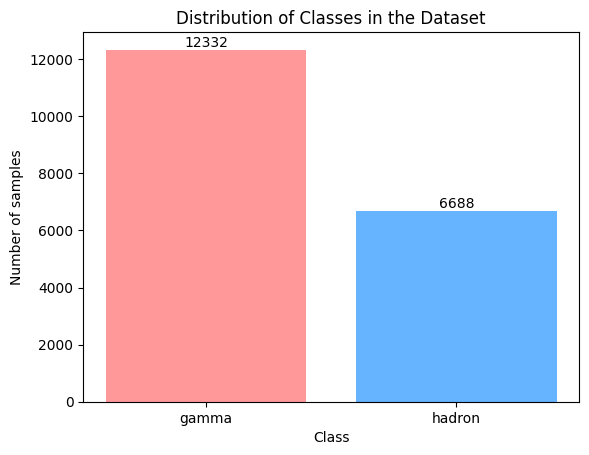

In [ ]:
gamma = np.sum(y == 1)
hadron = np.sum(y == 0)

print('So luong phan tu trong tap du lieu:', len(y))
print('So luong nhan can du doan:', len(np.unique(y)))
print('Nhan can du doan:', np.unique(y))
print()
print('So luong phan tu mang nhan g:', gamma)
print('So luong phan tu mang nhan h:', hadron)
print()


labels = ['gamma', 'hadron']
sizes = [gamma, hadron]
colors = ['#ff9999','#66b3ff']

plt.bar(labels, sizes, color=colors)
plt.title('Distribution of Classes in the Dataset')
plt.xlabel('Class')
plt.ylabel('Number of samples')
for i, v in enumerate(sizes):
    plt.text(i, v + 100, str(v), ha='center')
plt.show()

In [ ]:
for i in range(len(y.unique())):
    print(f'Du lieu mau cua nhan {i}:')
    print(X[y == i].head())

In [90]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [26]:
print('So luong phan tu trong tap du lieu huan luyen:', len(y_train))
print('So luong phan tu trong tap du lieu kiem tra:', len(y_test))
print()

So luong phan tu trong tap du lieu huan luyen: 13314
So luong phan tu trong tap du lieu kiem tra: 5706



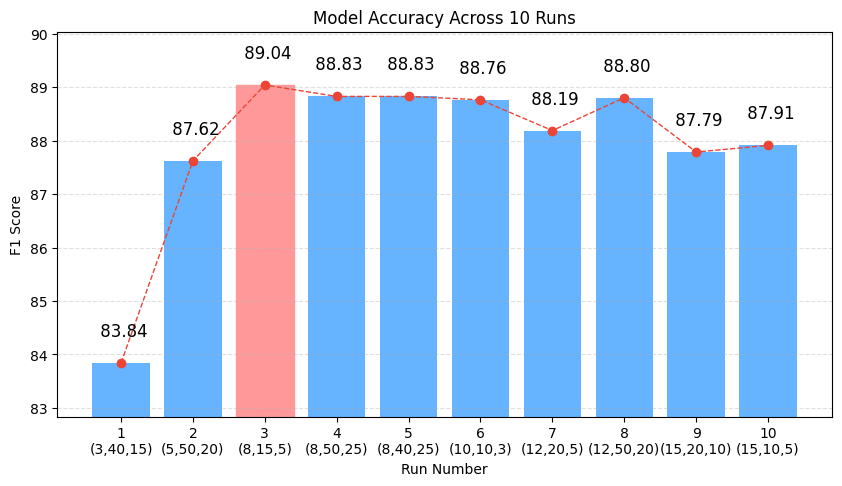

In [121]:
param_tuples = [
    # (max_depth, min_samples_split, min_samples_leaf)
    (3, 40, 15),
    (5, 50, 20),
    (8, 15, 5),
    (8, 50, 25),
    (8, 40, 25),
    (10, 10, 3),
    (12, 20, 5),
    (12, 50, 20),
    (15, 20, 10),
    (15, 10, 5)
]

f1s_DT = []

best_pred_DT = None
best_score_DT = float('-inf')
best_param = None

# print('Do chinh xac cua Decision Tree')

for i, (max_depth, min_samples_split, min_samples_leaf) in enumerate(param_tuples, 1):
    model_DT = DecisionTreeClassifier(
        criterion='gini', 
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    model_DT.fit(X_train, y_train)
    y_pred_DT = model_DT.predict(X_test)

    f1_DT = f1_score(y_test, y_pred_DT)
    f1s_DT.append(f1_DT)

    if f1_DT > best_score_DT:
        best_score_DT = f1_DT
        best_pred_DT = y_pred_DT
        best_param = (max_depth, min_samples_split, min_samples_leaf)

# print(f'Lan {i}: {100 * f1_DT:.2f} %')
# print()

f1s_percent = [f1 * 100 for f1 in f1s_DT]
runs = list(range(1, len(f1s_DT) + 1))
x_labels = [f"{i}\n({p[0]},{p[1]},{p[2]})" for i, p in enumerate(param_tuples, 1)]

plt.figure(figsize=(10, 5))
bar = plt.bar(runs, f1s_percent, color="#66b3ff")
plt.plot(runs, f1s_percent, marker='o', linestyle='--', linewidth=1, color="#EC4435")

best_idx = np.argmax(f1s_percent)
bar[best_idx].set_color("#ff9999")

for i, f1 in enumerate(f1s_percent):
    plt.text(runs[i], f1s_percent[i] + 0.5, f"{f1s_percent[i]: .2f}", ha='center', fontsize=12)

plt.xticks(runs, x_labels)
plt.ylim(min(f1s_percent) - 1, max(f1s_percent) + 1)
plt.xlabel("Run Number")
plt.ylabel("F1 Score")
plt.title("Model Accuracy Across 10 Runs")
plt.grid(True, linestyle='--', alpha=0.4, axis='y')
plt.show()

[[1368  633]
 [ 224 3481]]


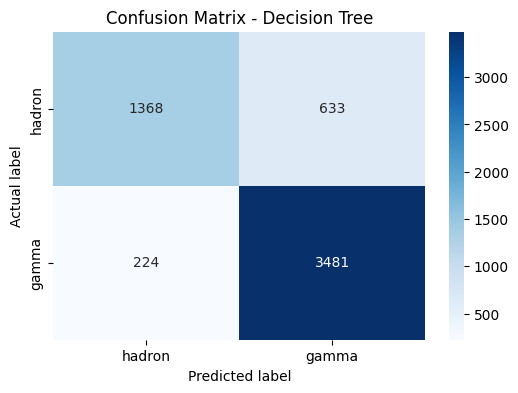

In [124]:
cm_DT = confusion_matrix(y_test, best_pred_DT)
print(cm_DT)

plt.figure(figsize=(6,4))
sns.heatmap(cm_DT, annot=True, fmt='d', cmap='Blues', xticklabels=['hadron','gamma'], yticklabels=['hadron','gamma'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

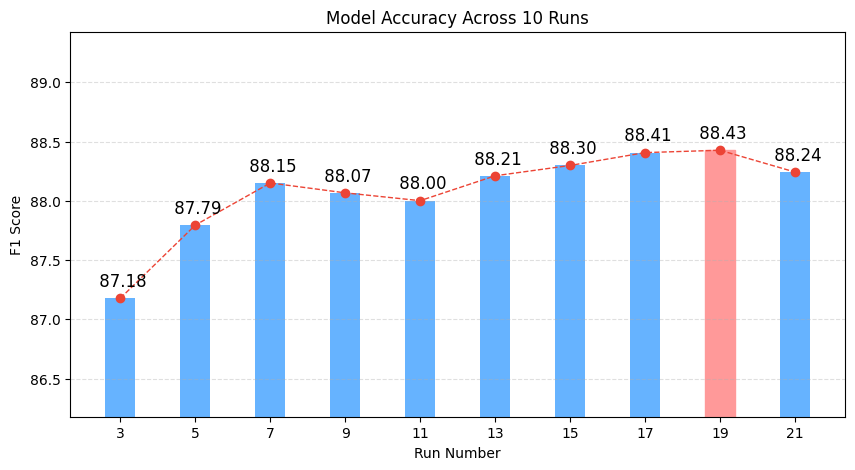

In [122]:
f1s_KNN = []

best_pred_KNN = None
best_score_KNN = float('-inf')
best_k = None

for k in range(3, 22, 2):    
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(X_train, y_train)
    y_pred_KNN = model_KNN.predict(X_test)

    f1_KNN = f1_score(y_test, y_pred_KNN)
    f1s_KNN.append(f1_KNN)

    if f1_KNN > best_score_KNN:
        best_score_KNN = f1_KNN
        best_pred_KNN = y_pred_KNN
        best_k = k

    # print(f"Voi k = {k}: {100 * f1_KNN:.2f} %")



f1s_percent = [f1 * 100 for f1 in f1s_KNN]
runs = list(range(3, 22, 2))

plt.figure(figsize=(10, 5))
bar = plt.bar(runs, f1s_percent, color="#66b3ff")
plt.plot(runs, f1s_percent, marker='o', linestyle='--', linewidth=1, color="#EC4435")  

best_idx = np.argmax(f1s_percent)
bar[best_idx].set_color("#ff9999")

for i, f1 in enumerate(f1s_percent):
    plt.text(runs[i], f1s_percent[i] + 0.1, f"{f1s_percent[i]: .2f}", ha='center', fontsize=12)

plt.xticks(runs)
plt.ylim(min(f1s_percent) - 1, max(f1s_percent) + 1)
plt.xlabel("Run Number")
plt.ylabel("F1 Score")
plt.title("Model Accuracy Across 10 Runs")
plt.grid(True, linestyle='--', alpha=0.4, axis='y')
plt.show()

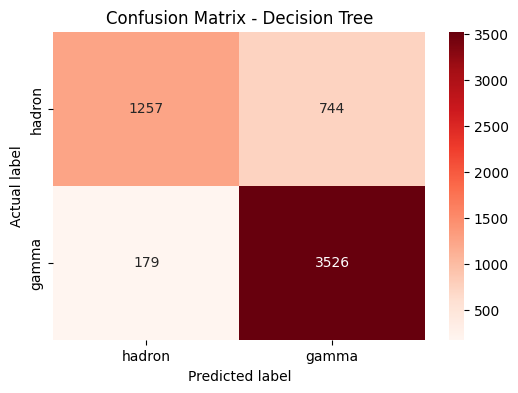

In [123]:
cm_KNN = confusion_matrix(y_test, best_pred_KNN)

plt.figure(figsize=(6,4))
sns.heatmap(cm_KNN, annot=True, fmt='d', cmap='Reds', xticklabels=['hadron','gamma'], yticklabels=['hadron','gamma'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [77]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
y_pred_NB = model_NB.predict(X_test)

f1_NB = f1_score(y_test, y_pred_NB)
print(f"Độ chính xác của Naive Bayes: {100 * f1_NB:.2f} %")

Độ chính xác của Naive Bayes: 81.43 %


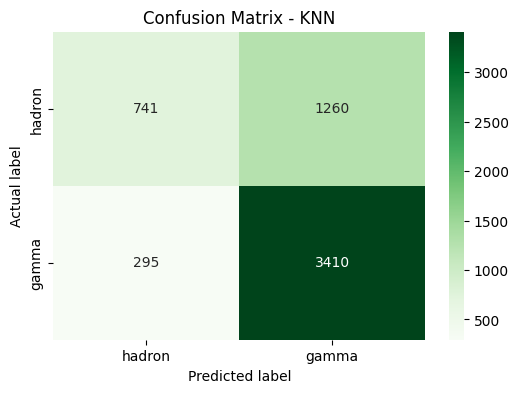

In [79]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

plt.figure(figsize=(6,4))
sns.heatmap(cm_NB, annot=True, fmt='d', cmap='Greens', xticklabels=['hadron','gamma'], yticklabels=['hadron','gamma'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix - KNN')
plt.show()

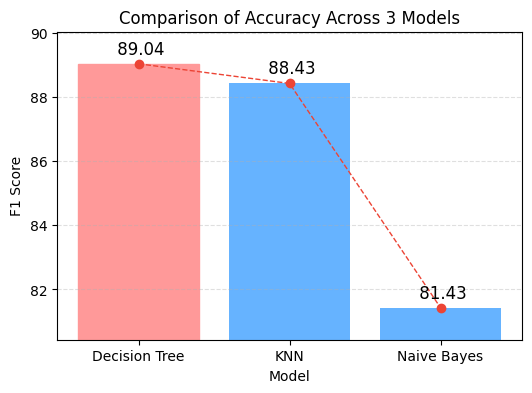

In [129]:
score = [best_score_DT, best_score_KNN, f1_NB]

f1s_percent = [f1 * 100 for f1 in score]
runs = ['Decision Tree', 'KNN', 'Naive Bayes']

plt.figure(figsize=(6, 4))
bar = plt.bar(runs, f1s_percent, color="#66b3ff")
plt.plot(runs, f1s_percent, marker='o', linestyle='--', linewidth=1, color="#EC4435")  

best_idx = np.argmax(f1s_percent)
bar[best_idx].set_color("#ff9999")

for i, f1 in enumerate(f1s_percent):
    plt.text(runs[i], f1s_percent[i] + 0.3, f"{f1s_percent[i]: .2f}", ha='center', fontsize=12)

plt.xticks(runs)
plt.ylim(min(f1s_percent) - 1, max(f1s_percent) + 1)
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.title("Comparison of Accuracy Across 3 Models")
plt.grid(True, linestyle='--', alpha=0.4, axis='y')
plt.show()